In [1]:
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from imblearn.under_sampling import RandomUnderSampler

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from datetime import datetime
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.metrics import roc_auc_score, mean_absolute_error, mean_squared_error
from tensorflow.keras.utils import to_categorical
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import shap
from sklearn.preprocessing import MinMaxScaler

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
import pandas as pd

# 파일 경로 지정
file_path = 'C:/Users/Jun-Hyun Bae/Desktop/raw_data/국민100/sarcopenic_obesity/so_minmax.csv'

# read_csv 메서드를 사용하여 CSV 파일을 데이터프레임으로 불러옴
df = pd.read_csv(file_path)

# 불러온 데이터프레임 확인
print(df.head())

        Age    Height    Weight   Bodyfat       DBP       SBP      Grip  \
0  0.043478  0.676471  0.909134  0.356713  0.250000  0.395604  0.968354   
1  0.347826  0.137255  0.052532  0.342685  0.392857  0.131868  0.409283   
2  0.565217  0.311275  0.255088  0.452906  0.428571  0.373626  0.358650   
3  0.304348  0.056373  0.574539  0.809619  0.571429  0.439560  0.327004   
4  0.478261  0.450980  0.548982  0.507014  0.553571  0.725275  0.767932   

   NormalGrip  sitreach      BMI  ...       TUG  8walktestsec  relativegrip  \
0    0.845371  0.615385  0.74375  ...  0.413897      0.500939      0.710167   
1    0.424212  0.457692  0.26250  ...  0.376133      0.432219      0.625190   
2    0.416073  0.636538  0.37500  ...  0.906344      0.737514      0.476480   
3    0.355036  0.692308  0.99375  ...  0.498489      0.609839      0.267071   
4    0.709054  0.490385  0.58125  ...  0.496979      0.549380      0.707132   

   Height_m  gender_numeric       ASM  ASM_by_Weight  ASM_by_Weight_perc  

In [ ]:
X = data[['Bodyfat', 'DBP', 'SBP', 'Grip', 'sitreach', 'BMI', 'sitstand', '2minstepcount', 'TUG', '8walktestsec']]
y = data['group_numberic']

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


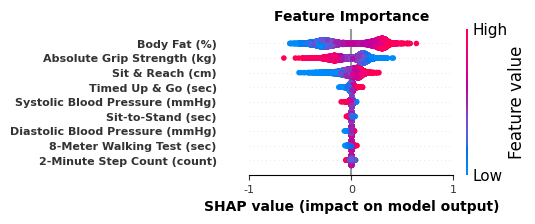

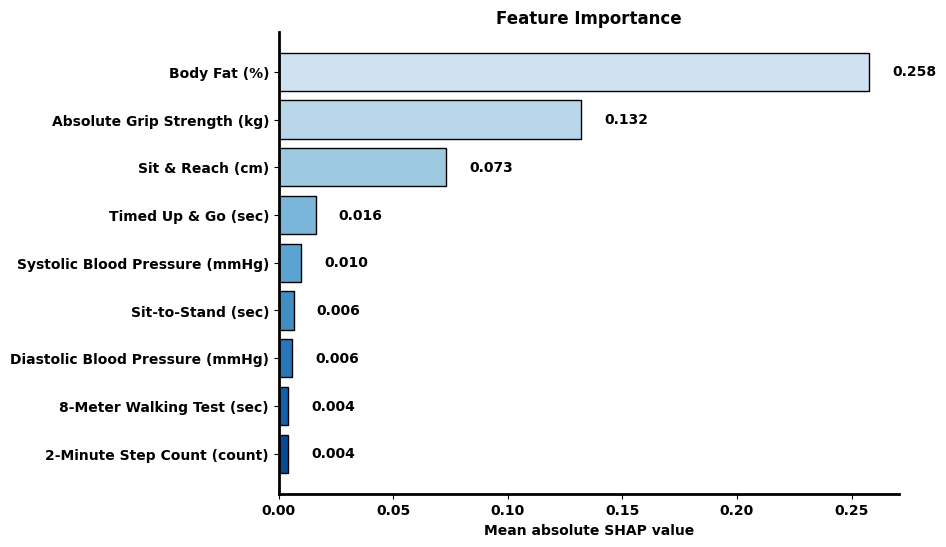

350/350 [==============================] - 0s 550us/step
Feature: Body Fat (%), Importance: 0.2577
Feature: Absolute Grip Strength (kg), Importance: 0.1319
Feature: Sit & Reach (cm), Importance: 0.0730
Feature: Timed Up & Go (sec), Importance: 0.0161
Feature: Systolic Blood Pressure (mmHg), Importance: 0.0099
Feature: Sit-to-Stand (sec), Importance: 0.0065
Feature: Diastolic Blood Pressure (mmHg), Importance: 0.0060
Feature: 8-Meter Walking Test (sec), Importance: 0.0041
Feature: 2-Minute Step Count (count), Importance: 0.0041
Specific Prediction: [0.8945951]
350/350 [==============================] - 0s 565us/step
Feature: Bodyfat, Importance: 0.2577, Prediction: 0.8945950865745544
Feature: Grip, Importance: 0.1319, Prediction: 0.3139546513557434
Feature: sitreach, Importance: 0.0730, Prediction: 0.00408973591402173
Feature: TUG, Importance: 0.0161, Prediction: 0.9872832298278809
Feature: SBP, Importance: 0.0099, Prediction: 0.7935613393783569
Feature: sitstand, Importance: 0.0065, Pr

In [3]:

# 데이터 로드 및 전처리
data = df
X = data[['Bodyfat', 'DBP', 'SBP', 'Grip','sitreach', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec']]
y = data['group_numberic']

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a dictionary to change variable names
rename_dict = {
    "Grip": "Absolute Grip Strength (kg)",
    "SBP": "Systolic Blood Pressure (mmHg)",
    "DBP": "Diastolic Blood Pressure (mmHg)",
    "Bodyfat": "Body Fat (%)",
    "sitreach": "Sit & Reach (cm)",
    "sitstand": "Sit-to-Stand (sec)",
    "2minstepcount": "2-Minute Step Count (count)",
    "TUG": "Timed Up & Go (sec)",
    "8walktestsec": "8-Meter Walking Test (sec)",
}

# Renaming columns in X_train and X_test
X_train_renamed = X_train.rename(columns=rename_dict)
X_test_renamed = X_test.rename(columns=rename_dict)

# Set the directory path where the model is saved
model_save_dir = r'c:\Users\Jun-Hyun Bae\Desktop\raw_data\국민100\sarcopenic_obesity\models'

# Configure model file path
best_fold = 1 # Fold number that showed the best results
best_model_timestamp = "2024-03-25_21-51-39" # Timestamp part of model file name
best_model_path = os.path.join(model_save_dir, f"undersampling_kfold_{best_fold}_{best_model_timestamp}.keras")

# load model
best_model = tf.keras.models.load_model(best_model_path)

# Convert X_train_renamed and X_test_renamed to NumPy arrays
X_train_np = X_train_renamed.values
X_test_np = X_test_renamed.values

# Create DeepExplainer object
explainer = shap.DeepExplainer(best_model, X_train_np)

# Calculate feature importance on the test set
shap_values = explainer.shap_values(X_test_np)

# Feature importance summary plot
fig, ax = plt.subplots(figsize=(5, 5))  # 조정된 그래프 크기
shap.summary_plot(shap_values[0], X_test_renamed, feature_names=X_test_renamed.columns, sort=True, show=False, plot_type="dot")
ax.grid(False) # remove grid
ax.set_xlabel('SHAP value (impact on model output)', weight='bold', fontsize=10)
ax.set_title('Feature Importance', weight='bold', fontsize=10)
for label in ax.get_yticklabels():
    label.set_weight('bold')
    label.set_fontsize(8)

# Set x-axis limits
#ax.set_xlim(-1, 1) 
#ax.set_xticks([-1, 0, 1])
#ax.set_xticklabels(['-1', '0', '1'])

# Customize x-axis ticks and labels with reduced font size
desired_ticks = [-1, 0, 1]  # Specify the tick values you want to display
ax.set_xticks(desired_ticks)
ax.set_xticklabels([str(tick) for tick in desired_ticks], fontsize=8)

# Manually adjust the margins
fig.subplots_adjust(left=0.15, right=0.85, top=0.85, bottom=0.15)

# Apply tight layout with adjusted padding
plt.tight_layout(pad=11)

plt.show()

# Calculate mean absolute SHAP values for each feature
mean_abs_shap = np.mean(np.abs(shap_values[0]), axis=0)  # Assuming single-output model

# Get sorted indices of features based on mean absolute SHAP values
sorted_idx = np.argsort(mean_abs_shap)[::-1]  # Descending order

# Define importance values as mean absolute SHAP values
importance_values = mean_abs_shap[sorted_idx]

# Create a bar plot for feature importance
fig, ax = plt.subplots(figsize=(8, 6))
colors = plt.cm.Blues(np.linspace(0.2, 0.9, len(sorted_idx)))  # Dark blue to light blue
bars = ax.barh(range(len(sorted_idx)), importance_values, color=colors, edgecolor='black')
ax.set_yticks(range(len(sorted_idx)))
ax.set_yticklabels(X_test_renamed.columns[sorted_idx], fontweight='bold')
ax.set_xlabel('Mean absolute SHAP value', weight='bold')
ax.set_title('Feature Importance', weight='bold')
ax.invert_yaxis()

# Annotate each bar with the importance value
for bar in bars:
    value = bar.get_width()  # Get the width of the bar (importance value)
    ax.text(value + 0.01, bar.get_y() + bar.get_height()/2, f"{value:.3f}", 
            va='center', ha='left', fontweight='bold')

# Adjust the thickness of the x-axis and y-axis
ax.spines['bottom'].set_linewidth(2)  # Adjust x-axis thickness
ax.spines['left'].set_linewidth(2)    # Adjust y-axis thickness

# Set x-axis tick parameters and make x-axis values bold
ax.tick_params(axis='x', labelsize=10, labelcolor='black', labelrotation=0)
for label in ax.get_xticklabels():
    label.set_fontweight('bold')

# Remove unwanted spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(False)  # Remove grid

plt.show()

# Predictions
actual_predictions = best_model.predict(X_test_renamed)

# Print feature importance for each feature
for feature in X_test_renamed.columns[sorted_idx]:
    importance = mean_abs_shap[X_test_renamed.columns.get_loc(feature)]
    print(f"Feature: {feature}, Importance: {importance:.4f}")

# Optionally, print a specific prediction (e.g., the first prediction in actual_predictions)
specific_prediction = actual_predictions[0]
print(f"Specific Prediction: {specific_prediction}")

actual_predictions = best_model.predict(X_test)
shap_and_actual = sorted(zip(X.columns, np.mean(np.abs(shap_values), axis=(0,1)), actual_predictions.flatten()), key=lambda x: x[1], reverse=True)
for feature, importance, prediction in shap_and_actual:
    print(f"Feature: {feature}, Importance: {importance:.4f}, Prediction: {prediction}")


In [4]:
# Predictions
actual_predictions = best_model.predict(X_test_renamed)

# Print feature importance for each feature
for feature in X_test_renamed.columns[sorted_idx]:
    importance = mean_abs_shap[X_test_renamed.columns.get_loc(feature)]
    print(f"Feature: {feature}, Importance: {importance:.4f}")

# Optionally, print a specific prediction (e.g., the first prediction in actual_predictions)
specific_prediction = actual_predictions[1]
print(f"Specific Prediction: {specific_prediction}")

actual_predictions = best_model.predict(X_test)
shap_and_actual = sorted(zip(X.columns, np.mean(np.abs(shap_values), axis=(0,1)), actual_predictions.flatten()), key=lambda x: x[1], reverse=True)
for feature, importance, prediction in shap_and_actual:
    print(f"Feature: {feature}, Importance: {importance:.4f}, Prediction: {prediction}")

350/350 [==============================] - 0s 480us/step
Feature: Body Fat (%), Importance: 0.2577
Feature: Absolute Grip Strength (kg), Importance: 0.1319
Feature: Sit & Reach (cm), Importance: 0.0730
Feature: Timed Up & Go (sec), Importance: 0.0161
Feature: Systolic Blood Pressure (mmHg), Importance: 0.0099
Feature: Sit-to-Stand (sec), Importance: 0.0065
Feature: Diastolic Blood Pressure (mmHg), Importance: 0.0060
Feature: 8-Meter Walking Test (sec), Importance: 0.0041
Feature: 2-Minute Step Count (count), Importance: 0.0041
Specific Prediction: [0.94434196]
350/350 [==============================] - 0s 469us/step
Feature: Bodyfat, Importance: 0.2577, Prediction: 0.8945950865745544
Feature: Grip, Importance: 0.1319, Prediction: 0.3139546513557434
Feature: sitreach, Importance: 0.0730, Prediction: 0.00408973591402173
Feature: TUG, Importance: 0.0161, Prediction: 0.9872832298278809
Feature: SBP, Importance: 0.0099, Prediction: 0.7935613393783569
Feature: sitstand, Importance: 0.0065, P

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


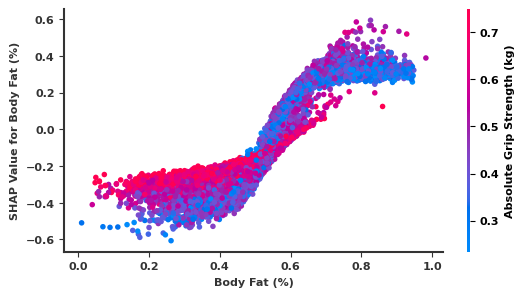

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats

# 데이터 로드 및 전처리
data = df
X = data[['Bodyfat', 'DBP', 'SBP', 'Grip','sitreach', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec']]
y = data['group_numberic']

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a dictionary to change variable names
rename_dict = {
    "Grip": "Absolute Grip Strength (kg)",
    "SBP": "Systolic Blood Pressure (mmHg)",
    "DBP": "Diastolic Blood Pressure (mmHg)",
    "Bodyfat": "Body Fat (%)",
    "sitreach": "Sit & Reach (cm)",
    "sitstand": "Sit-to-Stand (sec)",
    "2minstepcount": "2-Minute Step Count (count)",
    "TUG": "Timed Up & Go (sec)",
    "8walktestsec": "8-Meter Walking Test (sec)",
}

# Renaming columns in X_train and X_test
X_train_renamed = X_train.rename(columns=rename_dict)
X_test_renamed = X_test.rename(columns=rename_dict)

# Set the directory path where the model is saved
model_save_dir = r'c:\Users\Jun-Hyun Bae\Desktop\raw_data\국민100\sarcopenic_obesity\models'

# Configure model file path
best_fold = 1 # Fold number that showed the best results
best_model_timestamp = "2024-03-19_13-32-26" # Timestamp part of model file name
best_model_path = os.path.join(model_save_dir, f"undersampling_kfold_{best_fold}_{best_model_timestamp}.keras")

# load model
best_model = tf.keras.models.load_model(best_model_path)

# Convert X_train_renamed and X_test_renamed to NumPy arrays
X_train_np = X_train_renamed.values
X_test_np = X_test_renamed.values

# SHAP DeepExplainer 객체 생성
explainer = shap.DeepExplainer(best_model, X_train_np)

# 테스트 세트에 대한 특성 중요도 계산
shap_values = explainer.shap_values(X_test_np)

# 스케일링된 테스트 데이터에 열 이름 할당
X_test_scaled_df = pd.DataFrame(X_test_np, columns=X_test_renamed.columns)

# Choose a colormap (e.g., 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys')

# SHAP 의존성 플롯 생성
shap.dependence_plot('Body Fat (%)', shap_values[0], X_test_scaled_df, show=False)

# Access the current matplotlib figure and axes
fig = plt.gcf()
ax = plt.gca()

# Customize labels
ax.set_xlabel("Body Fat (%)", fontsize=8, fontweight='bold')
ax.set_ylabel("SHAP Value for Body Fat (%)", fontsize=8, fontweight='bold')

# Adjust the thickness of the x-axis and y-axis
ax.spines['bottom'].set_linewidth(1.5)  # Adjust x-axis thickness
ax.spines['left'].set_linewidth(1.5)    # Adjust y-axis thickness

# Set x-axis and y-axis tick labels to bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(8)
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(8)

# Customize color bar label
cbar = fig.axes[1]  # The color bar is usually the second axes object in the figure
cbar.set_ylabel("Absolute Grip Strength (kg)", fontsize=8, fontweight='bold')
for label in cbar.axes.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(8)

# Apply tight layout with adjusted padding
plt.tight_layout(pad=8.0)

# Show the plot
plt.show()

In [8]:
spearman_corr, p_value = stats.spearmanr(X_test_scaled_df['Body Fat (%)'], X_test_scaled_df['Absolute Grip Strength (kg)'])
print(f"Spearman Correlation between 'Body Fat (%)' and 'Absolute Grip Strength (kg)': {spearman_corr:.4f}, p-value: {p_value:.4f}")

Spearman Correlation between 'Body Fat (%)' and 'Absolute Grip Strength (kg)': -0.6097, p-value: 0.0000


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


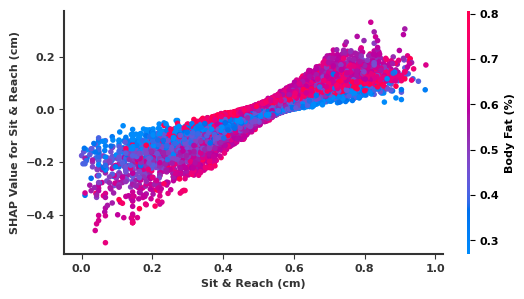

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats

# 데이터 로드 및 전처리
data = df
X = data[['Bodyfat', 'DBP', 'SBP', 'Grip','sitreach', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec']]
y = data['group_numberic']

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a dictionary to change variable names
rename_dict = {
    "Grip": "Absolute Grip Strength (kg)",
    "SBP": "Systolic Blood Pressure (mmHg)",
    "DBP": "Diastolic Blood Pressure (mmHg)",
    "Bodyfat": "Body Fat (%)",
    "sitreach": "Sit & Reach (cm)",
    "sitstand": "Sit-to-Stand (sec)",
    "2minstepcount": "2-Minute Step Count (count)",
    "TUG": "Timed Up & Go (sec)",
    "8walktestsec": "8-Meter Walking Test (sec)",
}

# Renaming columns in X_train and X_test
X_train_renamed = X_train.rename(columns=rename_dict)
X_test_renamed = X_test.rename(columns=rename_dict)

# Set the directory path where the model is saved
model_save_dir = r'c:\Users\Jun-Hyun Bae\Desktop\raw_data\국민100\sarcopenic_obesity\models'

# Configure model file path
best_fold = 1 # Fold number that showed the best results
best_model_timestamp = "2024-03-19_13-32-26" # Timestamp part of model file name
best_model_path = os.path.join(model_save_dir, f"undersampling_kfold_{best_fold}_{best_model_timestamp}.keras")

# load model
best_model = tf.keras.models.load_model(best_model_path)

# Convert X_train_renamed and X_test_renamed to NumPy arrays
X_train_np = X_train_renamed.values
X_test_np = X_test_renamed.values

# SHAP DeepExplainer 객체 생성
explainer = shap.DeepExplainer(best_model, X_train_np)

# 테스트 세트에 대한 특성 중요도 계산
shap_values = explainer.shap_values(X_test_np)

# 스케일링된 테스트 데이터에 열 이름 할당
X_test_scaled_df = pd.DataFrame(X_test_np, columns=X_test_renamed.columns)

# Choose a colormap (e.g., 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys')

# SHAP 의존성 플롯 생성
shap.dependence_plot('Sit & Reach (cm)', shap_values[0], X_test_scaled_df, show=False)

# Access the current matplotlib figure and axes
fig = plt.gcf()
ax = plt.gca()

# Customize labels
ax.set_xlabel("Sit & Reach (cm)", fontsize=8, fontweight='bold')
ax.set_ylabel("SHAP Value for Sit & Reach (cm)", fontsize=8, fontweight='bold')

# Adjust the thickness of the x-axis and y-axis
ax.spines['bottom'].set_linewidth(1.5)  # Adjust x-axis thickness
ax.spines['left'].set_linewidth(1.5)    # Adjust y-axis thickness

# Set x-axis and y-axis tick labels to bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(8)
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(8)

# Customize color bar label
cbar = fig.axes[1]  # The color bar is usually the second axes object in the figure
cbar.set_ylabel("Body Fat (%)", fontsize=8, fontweight='bold')
for label in cbar.axes.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(8)

# Apply tight layout with adjusted padding
plt.tight_layout(pad=8.0)

# Show the plot
plt.show()

In [12]:
spearman_corr, p_value = stats.spearmanr(X_test_scaled_df['Body Fat (%)'], X_test_scaled_df['Sit & Reach (cm)'])
print(f"Spearman Correlation between 'Body Fat (%)' and 'Sit & Reach (cm)': {spearman_corr:.4f}, p-value: {p_value:.4f}")

Spearman Correlation between 'Body Fat (%)' and 'Sit & Reach (cm)': 0.2591, p-value: 0.0000


Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


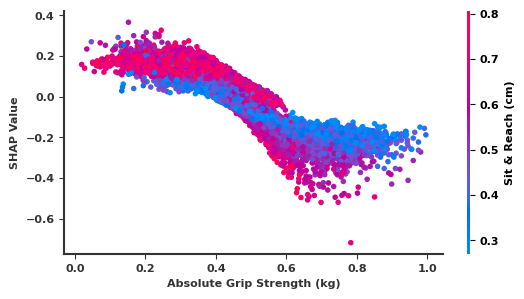

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import scipy.stats as stats

# 데이터 로드 및 전처리
data = df
X = data[['Bodyfat', 'DBP', 'SBP', 'Grip','sitreach', 'sitstand', '2minstepcount', 'TUG',
       '8walktestsec']]
y = data['group_numberic']

# Apply undersampling
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a dictionary to change variable names
rename_dict = {
    "Grip": "Absolute Grip Strength (kg)",
    "SBP": "Systolic Blood Pressure (mmHg)",
    "DBP": "Diastolic Blood Pressure (mmHg)",
    "Bodyfat": "Body Fat (%)",
    "sitreach": "Sit & Reach (cm)",
    "sitstand": "Sit-to-Stand (sec)",
    "2minstepcount": "2-Minute Step Count (count)",
    "TUG": "Timed Up & Go (sec)",
    "8walktestsec": "8-Meter Walking Test (sec)",
}

# Renaming columns in X_train and X_test
X_train_renamed = X_train.rename(columns=rename_dict)
X_test_renamed = X_test.rename(columns=rename_dict)

# Set the directory path where the model is saved
model_save_dir = r'c:\Users\Jun-Hyun Bae\Desktop\raw_data\국민100\sarcopenic_obesity\models'

# Configure model file path
best_fold = 1 # Fold number that showed the best results
best_model_timestamp = "2024-03-19_13-32-26" # Timestamp part of model file name
best_model_path = os.path.join(model_save_dir, f"undersampling_kfold_{best_fold}_{best_model_timestamp}.keras")

# load model
best_model = tf.keras.models.load_model(best_model_path)

# Convert X_train_renamed and X_test_renamed to NumPy arrays
X_train_np = X_train_renamed.values
X_test_np = X_test_renamed.values

# SHAP DeepExplainer 객체 생성
explainer = shap.DeepExplainer(best_model, X_train_np)

# 테스트 세트에 대한 특성 중요도 계산
shap_values = explainer.shap_values(X_test_np)

# 스케일링된 테스트 데이터에 열 이름 할당
X_test_scaled_df = pd.DataFrame(X_test_np, columns=X_test_renamed.columns)

# Choose a colormap (e.g., 'viridis', 'plasma', 'inferno', 'magma', 'cividis', 'Greys')

# SHAP 의존성 플롯 생성
shap.dependence_plot('Absolute Grip Strength (kg)', shap_values[0], X_test_scaled_df, show=False)

# Access the current matplotlib figure and axes
fig = plt.gcf()
ax = plt.gca()

# Customize labels
ax.set_xlabel("Absolute Grip Strength (kg)", fontsize=8, fontweight='bold')
ax.set_ylabel("SHAP Value", fontsize=8, fontweight='bold')

# Adjust the thickness of the x-axis and y-axis
ax.spines['bottom'].set_linewidth(1.5)  # Adjust x-axis thickness
ax.spines['left'].set_linewidth(1.5)    # Adjust y-axis thickness

# Set x-axis and y-axis tick labels to bold
for label in ax.get_xticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(8)
for label in ax.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(8)

# Customize color bar label
cbar = fig.axes[1]  # The color bar is usually the second axes object in the figure
cbar.set_ylabel("Sit & Reach (cm)", fontsize=8, fontweight='bold')
for label in cbar.axes.get_yticklabels():
    label.set_fontweight('bold')
    label.set_fontsize(8)

# Apply tight layout with adjusted padding
plt.tight_layout(pad=8.0)

# Show the plot
plt.show()

In [14]:
spearman_corr, p_value = stats.spearmanr(X_test_scaled_df['Absolute Grip Strength (kg)'], X_test_scaled_df['Sit & Reach (cm)'])
print(f"Spearman Correlation between 'Absolute Grip Strength (kg)' and 'Sit & Reach (cm)': {spearman_corr:.4f}, p-value: {p_value:.4f}")

Spearman Correlation between 'Absolute Grip Strength (kg)' and 'Sit & Reach (cm)': -0.2169, p-value: 0.0000
